<a href="https://colab.research.google.com/github/muhpuc40/BPL_Match_Result_Prediction/blob/main/BPL_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
#bpl = pd.read_csv('bpl.csv')
# Import necessary libraries
#import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Read the CSV file into a DataFrame
bpl = pd.read_csv('bpl.csv')

# Define the path to save the file in Google Drive
save_path = '/content/drive/My Drive/bpl_processed.csv'

# Save the DataFrame to the specified path
bpl.to_csv(save_path, index=False)

print(f"File saved to {save_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
File saved to /content/drive/My Drive/bpl_processed.csv


In [ ]:
bpl.describe()

,team_1_score,team_1_wicket,team_2_score,team_2_wicket,win_by_wickets,win_by_runs
count,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,155.767816,6.567816,141.650575,6.011494,3.213793,15.319540
std,31.838647,2.147096,29.356261,2.960937,3.388486,24.041371
min,44.000000,0.000000,45.000000,0.000000,0.000000,0.000000
25%,135.000000,5.000000,126.000000,4.000000,0.000000,0.000000
50%,157.000000,7.000000,142.000000,6.000000,3.000000,0.000000
75%,179.000000,8.000000,161.000000,9.000000,6.000000,23.000000
max,239.000000,10.000000,222.000000,10.000000,10.000000,119.000000


In [ ]:
bpl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   season           435 non-null    object
 1   match_no         435 non-null    object
 2   date             435 non-null    object
 3   team_1           435 non-null    object
 4   team_1_score     435 non-null    int64 
 5   team_1_wicket    435 non-null    int64 
 6   team_2           435 non-null    object
 7   team_2_score     435 non-null    int64 
 8   team_2_wicket    435 non-null    int64 
 9   player_of_match  435 non-null    object
 10  toss_winner      435 non-null    object
 11  toss_decision    435 non-null    object
 12  winner           435 non-null    object
 13  venue            435 non-null    object
 14  city             435 non-null    object
 15  win_by_wickets   435 non-null    int64 
 16  win_by_runs      435 non-null    int64 
 17  result           435 non-null    ob

In [ ]:
print(bpl[bpl['winner'] == 'Match'])

      season match_no         date            team_1  team_1_score  \
254  2018/19     11th  Jan 12 2019     Khulna Titans           151   
271  2019/20     30th   Jan 2 2020  Cumilla Warriors           140   

     team_1_wicket              team_2  team_2_score  team_2_wicket  \
254              6  Chittagong Vikings           151              8   
271              9      Sylhet Thunder           140             10   

      player_of_match         toss_winner toss_decision winner      venue  \
254   Robbie Frylinck  Chittagong Vikings   field first  Match      SBNCS   
271  Mujeeb Ur Rahman      Sylhet Thunder   field first  Match  SylhetICS   

       city  win_by_wickets  win_by_runs   result          umpire_1  \
254  Mirpur               0            0  won the  Morshed Ali Khan   
271  Sylhet               0            0  won the    Masudur Rahman   

                 umpire_2  
254     Ranmore Martinesz  
271  Prageeth Rambukwella  


In [ ]:
bpl = bpl[bpl['winner'] != 'Match']

In [ ]:
def replace_winner(row):
    if pd.notna(row['winner']):  # Check if the winner value is not NaN
        if row['winner'] in row['team_1']:
            return row['team_1']
        elif row['winner'] in row['team_2']:
            return row['team_2']
    return row['winner']

# Apply the function to the DataFrame
bpl['winner'] = bpl.apply(replace_winner, axis=1)

bpl.head()

<ipython-input-11-45bc975cc0ee>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bpl['winner'] = bpl.apply(replace_winner, axis=1)


,season,match_no,date,team_1,team_1_score,team_1_wicket,team_2,team_2_score,team_2_wicket,player_of_match,toss_winner,toss_decision,winner,venue,city,win_by_wickets,win_by_runs,result,umpire_1,umpire_2
0,2011/12,Final,Feb 29 2012,Barisal Burners,140,7,Dhaka Gladiators,144,2,Imran Nazir,Dhaka Gladiators,field first,Dhaka Gladiators,SBNCS,Mirpur,8,0,8 wickets,David Orchard,Enamul Haque
1,2011/12,2nd,Feb 28 2012,Dhaka Gladiators,191,4,Khulna Royal Bengals,182,7,Azhar Mahmood,Dhaka Gladiators,bat first,Dhaka Gladiators,SBNCS,Mirpur,0,9,9 runs,Enamul Haque,Nadir Shah
2,2011/12,1st,Feb 28 2012,Duronto Rajshahi,184,6,Barisal Burners,189,2,Ahmed Shehzad,Barisal Burners,field first,Barisal Burners,SBNCS,Mirpur,8,0,8 wickets,David Orchard,Sharfuddoula
3,2011/12,29th,Feb 27 2012,Dhaka Gladiators,116,10,Duronto Rajshahi,120,7,Mohammad Sami,Dhaka Gladiators,bat first,Duronto Rajshahi,SBNCS,Mirpur,3,0,3 wickets,Mahfuzur Rahman,Nadir Shah
4,2011/12,28th,Feb 26 2012,Chittagong Kings,150,9,Barisal Burners,151,5,Brad Hodge,Barisal Burners,field first,Barisal Burners,SBNCS,Mirpur,5,0,5 wickets,Gazi Sohel,Jeremy Lloyds


In [ ]:
# Mapping
team_mapping = {
    'Comilla Victorians': 'Comilla',
    'Cumilla Warriors': 'Comilla',
    'Rangpur Riders': 'Rangpur',
    'Rangpur Rangers': 'Rangpur',
    'Dhaka Dynamites': 'Dhaka',
    'Dhaka Dominators': 'Dhaka',
    'Dhaka Gladiators': 'Dhaka',
    'Durdanto Dhaka': 'Dhaka',
    'Dhaka Platoon': 'Dhaka',
    'Minister Group Dhaka': 'Dhaka',
    'Chittagong Vikings': 'Chattogram',
    'Chittagong Kings': 'Chattogram',
    'Chattogram Challengers': 'Chattogram',
    'Barishal Bulls': 'Barishal',
    'Barisal Bulls': 'Barishal',
    'Barisal Burners': 'Barishal',
    'Fortune Barishal': 'Barishal',
    'Rajshahi Kings': 'Rajshahi',
    'Duronto Rajshahi': 'Rajshahi',
    'Rajshahi Royals': 'Rajshahi',
    'Khulna Titans': 'Khulna',
    'Khulna Royal Bengals': 'Khulna',
    'Khulna Tigers': 'Khulna',
    'Sylhet Sixers': 'Sylhet',
    'Sylhet Royals': 'Sylhet',
    'Sylhet Strikers': 'Sylhet',
    'Sylhet Sunrisers': 'Sylhet',
    'Sylhet Thunder': 'Sylhet',
    'Sylhet Super Stars': 'Sylhet'
}

# Function to replace team names
def replace_team_name(team_name):
    return team_mapping.get(team_name, team_name)

# Apply the function to 'team_1', 'team_2', and 'winner' columns
bpl['team_1'] = bpl['team_1'].apply(replace_team_name)
bpl['team_2'] = bpl['team_2'].apply(replace_team_name)
bpl['winner'] = bpl['winner'].apply(replace_team_name)
bpl['toss_winner'] = bpl['toss_winner'].apply(replace_team_name)

bpl.head()

<ipython-input-12-50a030351b48>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bpl['team_1'] = bpl['team_1'].apply(replace_team_name)
<ipython-input-12-50a030351b48>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bpl['team_2'] = bpl['team_2'].apply(replace_team_name)
<ipython-input-12-50a030351b48>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

,season,match_no,date,team_1,team_1_score,team_1_wicket,team_2,team_2_score,team_2_wicket,player_of_match,toss_winner,toss_decision,winner,venue,city,win_by_wickets,win_by_runs,result,umpire_1,umpire_2
0,2011/12,Final,Feb 29 2012,Barishal,140,7,Dhaka,144,2,Imran Nazir,Dhaka,field first,Dhaka,SBNCS,Mirpur,8,0,8 wickets,David Orchard,Enamul Haque
1,2011/12,2nd,Feb 28 2012,Dhaka,191,4,Khulna,182,7,Azhar Mahmood,Dhaka,bat first,Dhaka,SBNCS,Mirpur,0,9,9 runs,Enamul Haque,Nadir Shah
2,2011/12,1st,Feb 28 2012,Rajshahi,184,6,Barishal,189,2,Ahmed Shehzad,Barishal,field first,Barishal,SBNCS,Mirpur,8,0,8 wickets,David Orchard,Sharfuddoula
3,2011/12,29th,Feb 27 2012,Dhaka,116,10,Rajshahi,120,7,Mohammad Sami,Dhaka,bat first,Rajshahi,SBNCS,Mirpur,3,0,3 wickets,Mahfuzur Rahman,Nadir Shah
4,2011/12,28th,Feb 26 2012,Chattogram,150,9,Barishal,151,5,Brad Hodge,Barishal,field first,Barishal,SBNCS,Mirpur,5,0,5 wickets,Gazi Sohel,Jeremy Lloyds


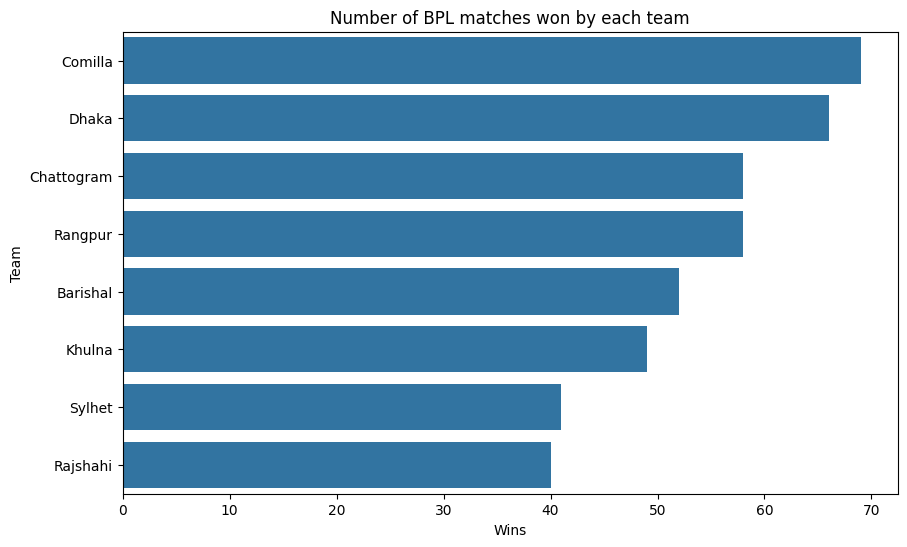

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Set the size of the figure
plt.figure(figsize=(10, 6))

# Create the count plot
sns.countplot(y='winner', data=bpl, order=bpl['winner'].value_counts().index)

# Set the labels and title
plt.xlabel('Wins')
plt.ylabel('Team')
plt.title('Number of BPL matches won by each team')
plt.show()

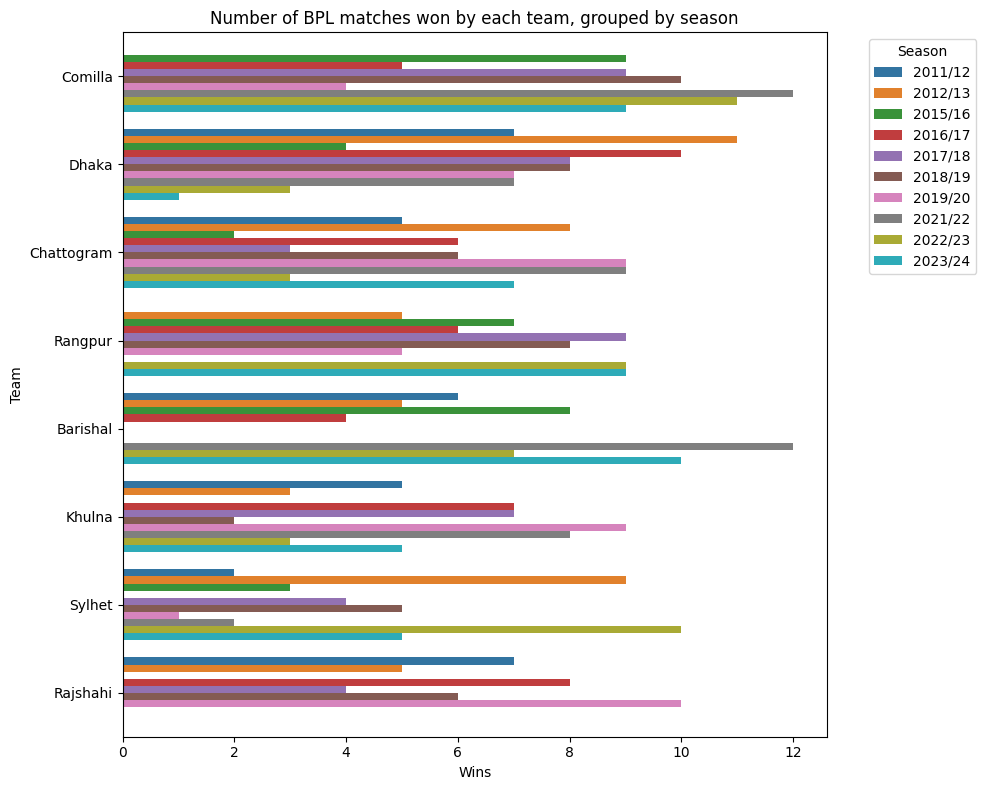

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# set figure
plt.figure(figsize=(10, 8))

# Create the count plot grouped by season
sns.countplot(y='winner', data=bpl, order=bpl['winner'].value_counts().index, hue='season')

# Set the labels and title
plt.xlabel('Wins')
plt.ylabel('Team')
plt.title('Number of BPL matches won by each team, grouped by season')

# Display the plot
plt.legend(title='Season', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

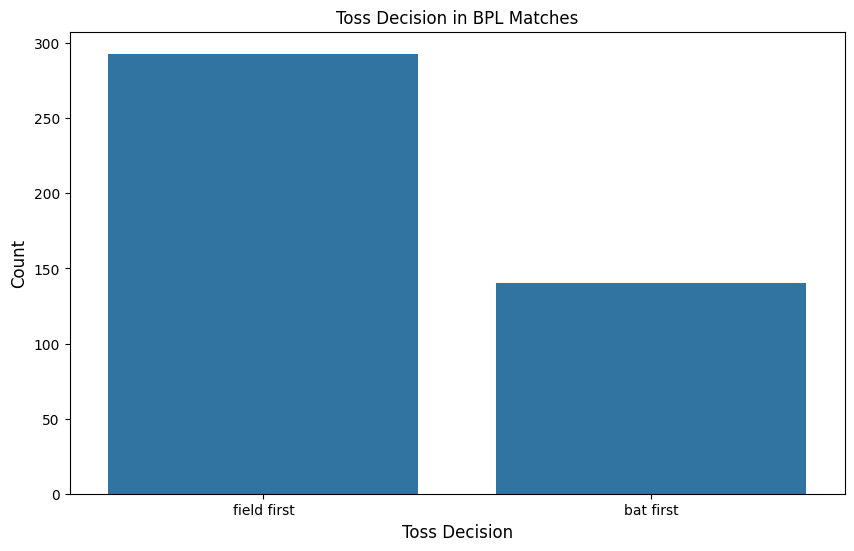

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Set figure
plt.figure(figsize=(10, 6))

# Create the count plot for toss decisions
sns.countplot(x='toss_decision', data=bpl)

# Set the labels and title
plt.xlabel('Toss Decision', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Toss Decision in BPL Matches')

# Display the plot
plt.show()

In [ ]:
# List of columns to analyze

columns_to_analyze = ['season','match_no', 'team_1', 'team_1_score', 'team_1_wicket', 'team_2',
       'team_2_score', 'team_2_wicket', 'player_of_match', 'toss_winner',
       'toss_decision', 'winner', 'venue', 'city', 'win_by_wickets',
       'win_by_runs', 'result','umpire_1','umpire_2']
# Loop through each column and print unique values and their counts
for column in columns_to_analyze:
    print(f"------------\n{column}:\n")
    print("Unique values:")
    print(bpl[column].unique())
    print("\nValue counts:")
    print(bpl[column].value_counts())
    print("\n")


------------
season:

Unique values:
['2011/12' '2012/13' '2015/16' '2016/17' '2017/18' '2018/19' '2019/20'
 '2021/22' '2022/23' '2023/24']

Value counts:
season
2021/22    50
2012/13    46
2016/17    46
2022/23    46
2023/24    46
2018/19    45
2019/20    45
2017/18    44
2015/16    33
2011/12    32
Name: count, dtype: int64


------------
match_no:

Unique values:
['Final' '2nd' '1st' '29th' '28th' '27th' '26th' '25th' '24th' '23rd'
 'Semi-Final' '22nd' '21st' 'Elimination' '20th' 'Race' '19th' '42nd'
 '18th' '41st' '17th' '40th' '16th' '15th' '39th' '14th' '38th' '13th'
 '12th' 'Qualifier' '11th' 'Eliminator' '10th' '9th' '8th' '7th' '6th'
 '5th' '4th' '3rd' 'Eliminator,' '37th' '36th' '35th' '34th' '33rd' '32nd'
 '31st' '30th' '2nd ' '1st Qualifier' '2nd Qualifier' 'Final ' '31th'
 'Qualifier1' 'Qualifier2']

Value counts:
match_no
1st              14
2nd              13
13th             11
14th             11
10th             11
17th             11
9th              11
18th        

In [ ]:
from sklearn.preprocessing import LabelEncoder


# Create a copy of the dataframe
copy_df = bpl.copy()

# Define the columns to be included in the dataframe
columns = ['season', 'match_no', 'team_1', 'team_1_score', 'team_1_wicket', 'team_2',
           'team_2_score', 'team_2_wicket', 'player_of_match', 'toss_winner', 'toss_decision',
           'winner', 'venue', 'city', 'win_by_wickets', 'win_by_runs', 'result', 'umpire_1', 'umpire_2']

# Create the dataframe with the specified columns
dataframe = pd.DataFrame(copy_df, columns=columns)

# Function to extract the year from the season and convert to integer
def extract_year(season):
    return int(season.split('/')[1])

# Apply the function to the 'season' column
dataframe['season'] = dataframe['season'].apply(extract_year)


# Ensure the 'season' column is integer type
dataframe['season'] = dataframe['season'].astype(int)

dataframe.head()

,season,match_no,team_1,team_1_score,team_1_wicket,team_2,team_2_score,team_2_wicket,player_of_match,toss_winner,toss_decision,winner,venue,city,win_by_wickets,win_by_runs,result,umpire_1,umpire_2
0,12,Final,Barishal,140,7,Dhaka,144,2,Imran Nazir,Dhaka,field first,Dhaka,SBNCS,Mirpur,8,0,8 wickets,David Orchard,Enamul Haque
1,12,2nd,Dhaka,191,4,Khulna,182,7,Azhar Mahmood,Dhaka,bat first,Dhaka,SBNCS,Mirpur,0,9,9 runs,Enamul Haque,Nadir Shah
2,12,1st,Rajshahi,184,6,Barishal,189,2,Ahmed Shehzad,Barishal,field first,Barishal,SBNCS,Mirpur,8,0,8 wickets,David Orchard,Sharfuddoula
3,12,29th,Dhaka,116,10,Rajshahi,120,7,Mohammad Sami,Dhaka,bat first,Rajshahi,SBNCS,Mirpur,3,0,3 wickets,Mahfuzur Rahman,Nadir Shah
4,12,28th,Chattogram,150,9,Barishal,151,5,Brad Hodge,Barishal,field first,Barishal,SBNCS,Mirpur,5,0,5 wickets,Gazi Sohel,Jeremy Lloyds


In [ ]:
le = LabelEncoder()

for col in columns:
    dataframe[col] = le.fit_transform(dataframe[col])

print(dataframe.dtypes)

dataframe.tail(20)

season             int64
match_no           int64
team_1             int64
team_1_score       int64
team_1_wicket      int64
team_2             int64
team_2_score       int64
team_2_wicket      int64
player_of_match    int64
toss_winner        int64
toss_decision      int64
winner             int64
venue              int64
city               int64
win_by_wickets     int64
win_by_runs        int64
result             int64
umpire_1           int64
umpire_2           int64
dtype: object


,season,match_no,team_1,team_1_score,team_1_wicket,team_2,team_2_score,team_2_wicket,player_of_match,toss_winner,toss_decision,winner,venue,city,win_by_wickets,win_by_runs,result,umpire_1,umpire_2
415,9,19,6,119,3,1,79,6,60,6,0,6,2,2,0,47,54,7,16
416,9,20,0,101,4,3,70,10,153,0,0,0,2,2,0,38,42,10,11
417,9,21,2,129,3,1,87,10,168,1,1,2,4,0,0,64,75,13,13
418,9,25,6,124,5,4,62,10,56,6,0,6,4,0,0,68,79,10,11
419,9,27,0,98,6,3,80,8,156,0,0,0,4,0,0,26,26,10,5
420,9,28,4,76,8,2,89,3,163,4,0,2,4,0,7,0,71,13,36
421,9,29,3,40,7,4,52,5,167,3,0,4,4,0,5,0,51,10,12
422,9,30,6,99,8,1,90,6,75,6,0,6,4,0,0,18,16,13,5
423,9,31,0,95,6,7,86,8,70,0,0,0,4,0,0,18,16,13,36
424,9,32,1,71,6,3,70,5,158,1,0,1,4,0,0,10,4,10,11


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming the dataframe has been preprocessed as described before
# Replace 'dataframe' with your preprocessed DataFrame if needed

# Define the feature matrix and target vector
X = dataframe[['season','match_no', 'team_1', 'team_1_score', 'team_1_wicket', 'team_2',
       'team_2_score', 'team_2_wicket', 'player_of_match', 'toss_winner',
       'toss_decision', 'venue', 'city', 'win_by_wickets',
       'win_by_runs', 'result','umpire_1','umpire_2']]
y = dataframe['winner']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# Initialize the Decision Tree Classifier model
model = DecisionTreeClassifier(random_state=1)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Accuracy: 0.9310344827586207
Confusion Matrix:
[[11  0  0  0  0  0  0  0]
 [ 0 15  0  0  0  0  0  0]
 [ 1  0 13  0  0  0  0  2]
 [ 0  0  0 11  1  0  0  0]
 [ 0  0  0  0  9  1  0  0]
 [ 0  0  0  0  0  6  0  0]
 [ 0  0  0  0  0  0  9  0]
 [ 0  0  0  0  0  0  1  7]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      1.00      1.00        15
           2       1.00      0.81      0.90        16
           3       1.00      0.92      0.96        12
           4       0.90      0.90      0.90        10
           5       0.86      1.00      0.92         6
           6       0.90      1.00      0.95         9
           7       0.78      0.88      0.82         8

    accuracy                           0.93        87
   macro avg       0.92      0.94      0.93        87
weighted avg       0.94      0.93      0.93        87



In [ ]:

from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Prepare the features (X) and the target variable (y)
X = dataframe[['season','match_no', 'team_1', 'team_1_score', 'team_1_wicket', 'team_2',
       'team_2_score', 'team_2_wicket', 'player_of_match', 'toss_winner',
       'toss_decision', 'venue', 'city', 'win_by_wickets',
       'win_by_runs', 'result','umpire_1','umpire_2']]
y = dataframe['winner']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

# Initialize the XGBoost model
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Accuracy: 0.9770114942528736
Confusion Matrix:
[[ 9  0  0  0  0  0  0  1]
 [ 0 10  0  0  0  0  0  0]
 [ 1  0 14  0  0  0  0  0]
 [ 0  0  0 14  0  0  0  0]
 [ 0  0  0  0 12  0  0  0]
 [ 0  0  0  0  0  7  0  0]
 [ 0  0  0  0  0  0 11  0]
 [ 0  0  0  0  0  0  0  8]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       1.00      1.00      1.00        10
           2       1.00      0.93      0.97        15
           3       1.00      1.00      1.00        14
           4       1.00      1.00      1.00        12
           5       1.00      1.00      1.00         7
           6       1.00      1.00      1.00        11
           7       0.89      1.00      0.94         8

    accuracy                           0.98        87
   macro avg       0.97      0.98      0.98        87
weighted avg       0.98      0.98      0.98        87



In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Prepare the features (X) and the target variable (y)
X = dataframe[['season','match_no', 'team_1', 'team_1_score', 'team_1_wicket', 'team_2',
       'team_2_score', 'team_2_wicket', 'player_of_match', 'toss_winner',
       'toss_decision', 'venue', 'city', 'win_by_wickets',
       'win_by_runs', 'result','umpire_1','umpire_2']]
y = dataframe['winner']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize the Gradient Boosting model
model = GradientBoostingClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Accuracy: 0.9885057471264368
Confusion Matrix:
[[11  0  1  0  0  0  0  0]
 [ 0 15  0  0  0  0  0  0]
 [ 0  0 18  0  0  0  0  0]
 [ 0  0  0 12  0  0  0  0]
 [ 0  0  0  0  7  0  0  0]
 [ 0  0  0  0  0  7  0  0]
 [ 0  0  0  0  0  0 10  0]
 [ 0  0  0  0  0  0  0  6]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       1.00      1.00      1.00        15
           2       0.95      1.00      0.97        18
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00         7
           6       1.00      1.00      1.00        10
           7       1.00      1.00      1.00         6

    accuracy                           0.99        87
   macro avg       0.99      0.99      0.99        87
weighted avg       0.99      0.99      0.99        87



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Prepare the features (X) and the target variable (y)
X = dataframe[['season','match_no', 'team_1', 'team_1_score', 'team_1_wicket', 'team_2',
       'team_2_score', 'team_2_wicket', 'player_of_match', 'toss_winner',
       'toss_decision', 'venue', 'city', 'win_by_wickets',
       'win_by_runs', 'result','umpire_1','umpire_2']]
y = dataframe['winner']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Initialize the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=0)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Accuracy: 0.896551724137931
Confusion Matrix:
[[ 7  0  0  0  0  0  0  0]
 [ 0 10  0  0  0  0  0  0]
 [ 0  0 14  0  0  0  0  0]
 [ 0  0  3 15  0  0  0  0]
 [ 0  0  0  0  6  0  0  0]
 [ 0  0  0  0  0  6  1  0]
 [ 1  0  0  0  0  1 12  0]
 [ 0  0  0  0  1  0  2  8]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      1.00      1.00        10
           2       0.82      1.00      0.90        14
           3       1.00      0.83      0.91        18
           4       0.86      1.00      0.92         6
           5       0.86      0.86      0.86         7
           6       0.80      0.86      0.83        14
           7       1.00      0.73      0.84        11

    accuracy                           0.90        87
   macro avg       0.90      0.91      0.90        87
weighted avg       0.91      0.90      0.90        87



In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.metrics import mean_absolute_error




# Assuming the dataframe has been preprocessed as described before
# Define the feature matrix and target vector
X = dataframe[['season', 'match_no', 'team_1', 'team_1_score', 'team_1_wicket', 'team_2',
               'team_2_score', 'team_2_wicket', 'player_of_match', 'toss_winner',
               'toss_decision', 'venue', 'city', 'win_by_wickets',
               'win_by_runs', 'result', 'umpire_1', 'umpire_2']]
y = dataframe['winner']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize the SVM model
model = SVC(kernel='linear', random_state=1)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)
# Calculate the Zero-one loss
error = mean_absolute_error(y_test, y_pred)

print(f'mean_absolute_error: {error}')

Accuracy: 0.28735632183908044
Confusion Matrix:
[[4 3 2 2 1 0 0 0]
 [3 4 2 3 2 0 1 0]
 [2 4 5 3 1 0 3 0]
 [0 1 2 8 0 1 0 0]
 [0 2 1 0 1 1 2 0]
 [0 3 0 1 0 0 2 1]
 [0 1 0 0 2 1 3 3]
 [0 3 0 0 2 1 0 0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.33      0.38        12
           1       0.19      0.27      0.22        15
           2       0.42      0.28      0.33        18
           3       0.47      0.67      0.55        12
           4       0.11      0.14      0.12         7
           5       0.00      0.00      0.00         7
           6       0.27      0.30      0.29        10
           7       0.00      0.00      0.00         6

    accuracy                           0.29        87
   macro avg       0.24      0.25      0.24        87
weighted avg       0.29      0.29      0.28        87

mean_absolute_error: 1.6091954022988506


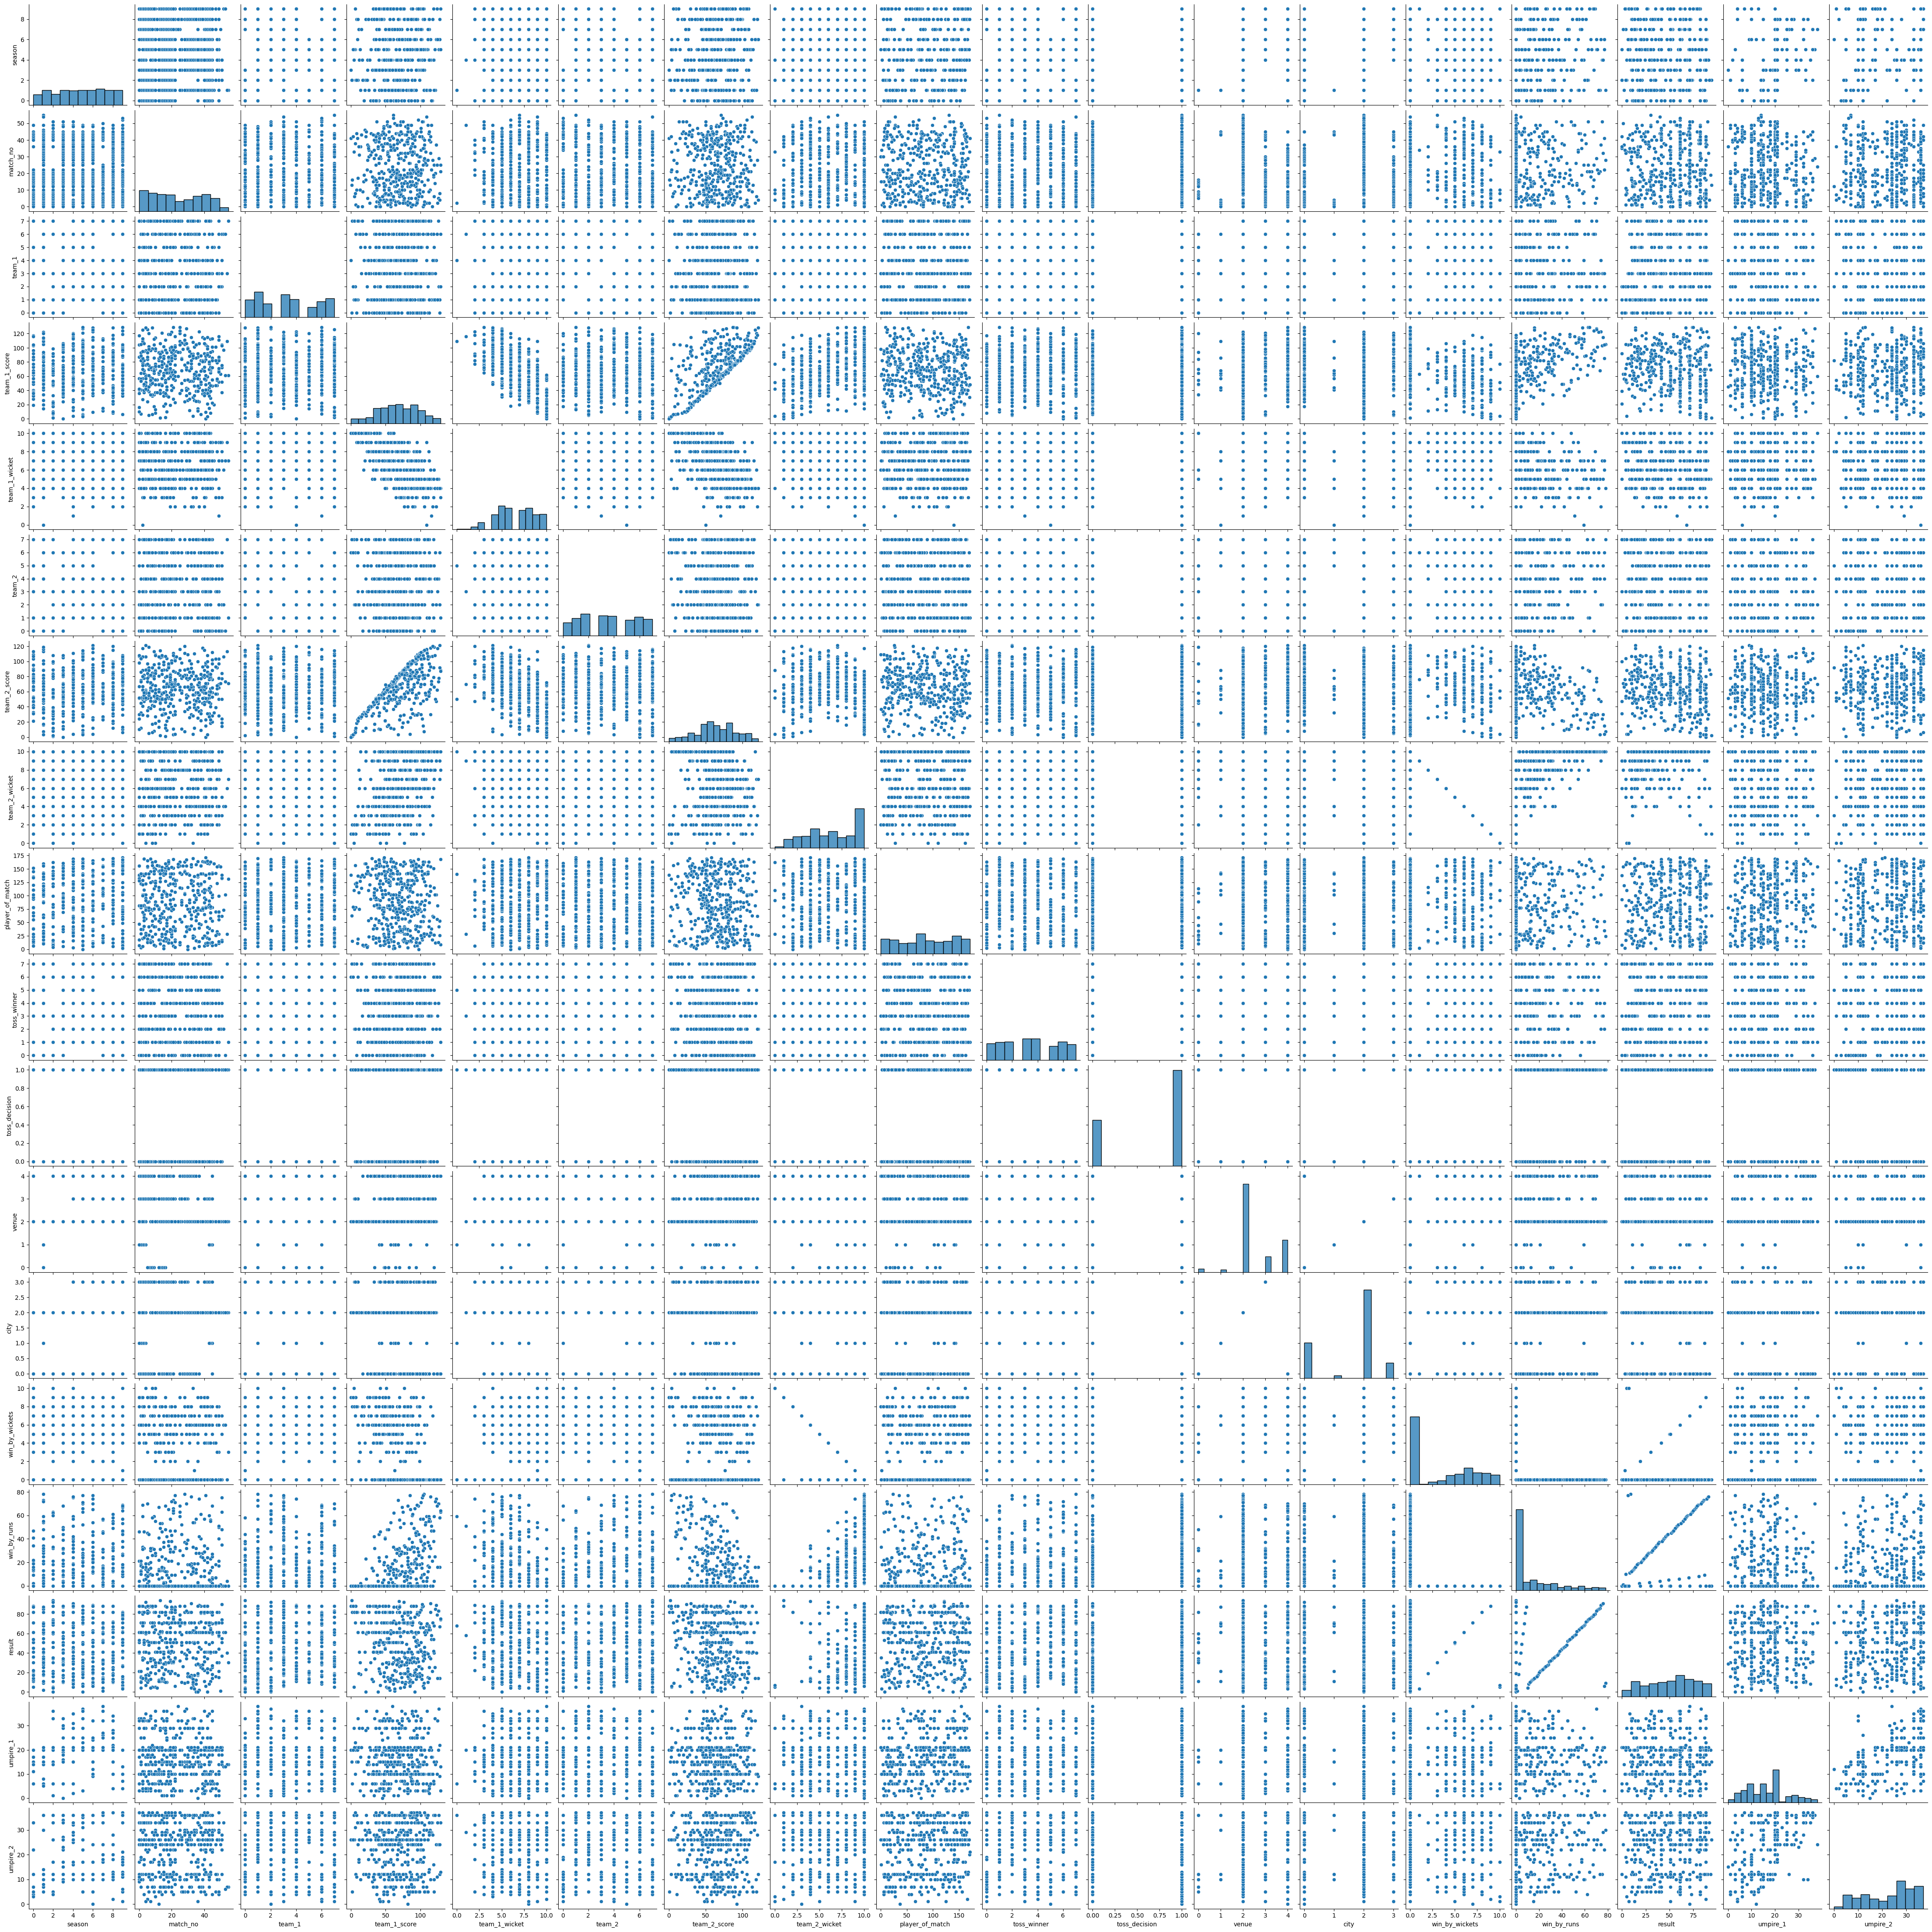

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming dataframe only contains numerical columns
numerical_columns = ['season', 'match_no', 'team_1', 'team_1_score', 'team_1_wicket', 'team_2',
               'team_2_score', 'team_2_wicket', 'player_of_match', 'toss_winner',
               'toss_decision', 'venue', 'city', 'win_by_wickets',
               'win_by_runs', 'result', 'umpire_1', 'umpire_2']

# Create pairplot
sns.pairplot(dataframe[numerical_columns])
plt.show()


In [ ]:
dataframe.corr().T

,season,match_no,team_1,team_1_score,team_1_wicket,team_2,team_2_score,team_2_wicket,player_of_match,toss_winner,toss_decision,winner,venue,city,win_by_wickets,win_by_runs,result,umpire_1,umpire_2
season,1.000000,0.015079,-0.008970,0.102945,0.013813,-0.047261,0.096588,0.028527,0.124205,-0.073526,0.162846,-0.048760,0.270347,0.073165,-0.003733,0.024296,-0.044920,0.037797,0.076691
match_no,0.015079,1.000000,-0.042899,-0.006177,0.067450,0.052645,-0.024978,0.021306,-0.009393,0.050308,-0.028239,0.052355,-0.278173,0.283745,0.005458,0.013684,0.003009,-0.051331,0.016556
team_1,-0.008970,-0.042899,1.000000,-0.015035,-0.015225,-0.123472,-0.001683,-0.066006,0.001791,0.234347,0.039698,0.376784,-0.003748,0.078892,0.097053,-0.012264,0.134644,-0.068023,-0.061562
team_1_score,0.102945,-0.006177,-0.015035,1.000000,-0.666096,0.030631,0.665647,0.393494,-0.074535,0.047989,0.097345,-0.028908,0.177820,-0.130889,-0.464309,0.500223,-0.149329,-0.014628,0.043466
team_1_wicket,0.013813,0.067450,-0.015225,-0.666096,1.000000,0.004556,-0.462933,-0.188325,0.051164,-0.050353,-0.087670,0.014591,-0.069075,0.022808,0.247046,-0.312099,0.019156,0.031658,-0.021640
team_2,-0.047261,0.052645,-0.123472,0.030631,0.004556,1.000000,-0.044180,0.027676,-0.027793,0.631082,0.015819,0.484399,-0.046393,0.065607,-0.083246,0.082965,0.000463,0.001440,0.047019
team_2_score,0.096588,-0.024978,-0.001683,0.665647,-0.462933,-0.044180,1.000000,-0.157325,-0.070695,-0.019675,0.019468,-0.027479,0.167755,-0.125428,0.036032,-0.302399,-0.116732,-0.016260,0.007623
team_2_wicket,0.028527,0.021306,-0.066006,0.393494,-0.188325,0.027676,-0.157325,1.000000,-0.005478,0.005451,0.082959,-0.022847,0.017085,-0.029063,-0.895449,0.701724,-0.495019,0.040566,0.021785
player_of_match,0.124205,-0.009393,0.001791,-0.074535,0.051164,-0.027793,-0.070695,-0.005478,1.000000,-0.042322,-0.037791,0.006907,0.023202,0.042667,0.023370,-0.009469,0.041408,0.113416,-0.005929
toss_winner,-0.073526,0.050308,0.234347,0.047989,-0.050353,0.631082,-0.019675,0.005451,-0.042322,1.000000,0.080601,0.440320,-0.010969,0.078164,-0.069768,0.076918,0.074410,0.019376,-0.001141


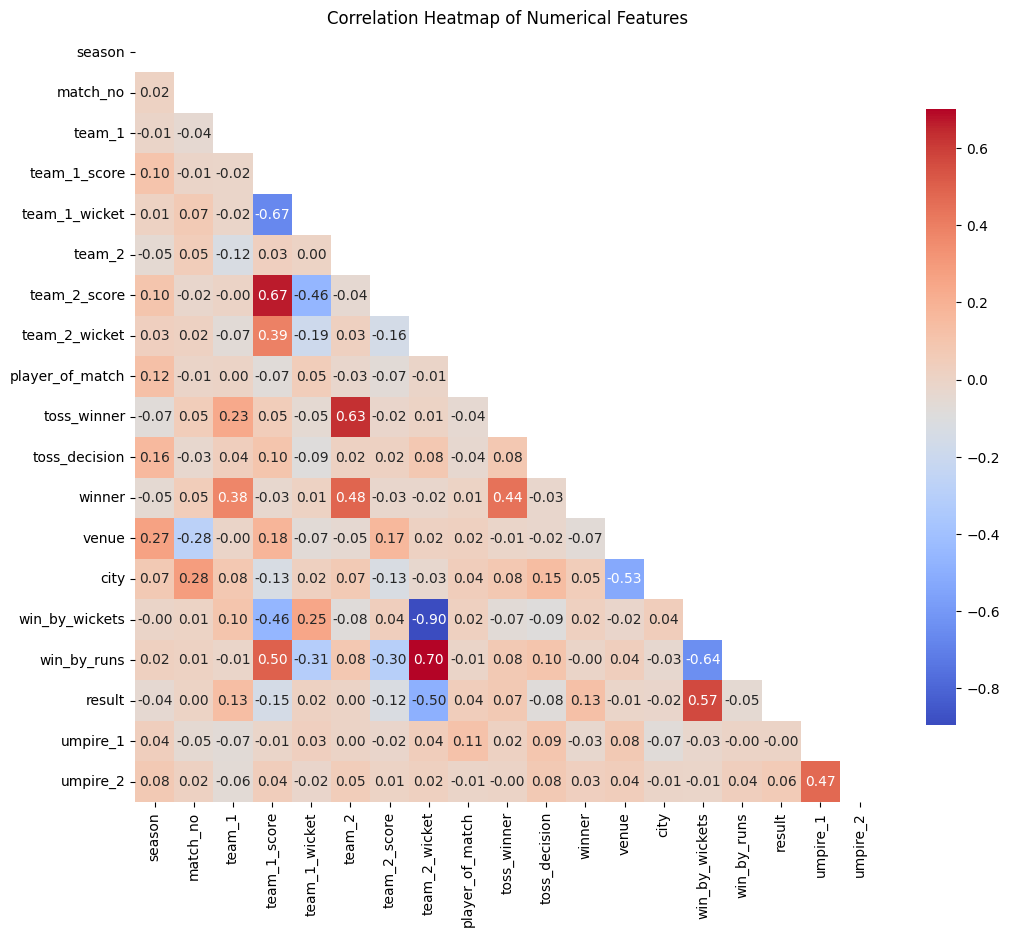

In [ ]:

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_num is your numerical DataFrame
# Compute the correlation matrix
corr = dataframe.corr(method='pearson')

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Plot the heatmap
sns.heatmap(corr, annot=True, fmt='.2f', mask=mask, cmap='coolwarm', cbar_kws={"shrink": 0.8})

# Add title and show plot
plt.title('Correlation Heatmap of Numerical Features')
plt.show()
